In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('spambase.data',header = None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
# Spam emails count
(data.iloc[:,57] == 1).sum()

1813

In [5]:
# regular emails count
count = 4601-1813
print(count)

2788


In [6]:
# No missing data
data.applymap(lambda x: x is None).sum().sum()

0

In [7]:
# No missing data
data.isnull().sum().sum()

0

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:-1], data.iloc[:,-1], test_size = 0.2, shuffle = True, random_state = 1)

## CART

In [9]:
# When max_depth was 4 or None, CART accuracy were both 91.0%.
# Set max_depth = 4 to have a good tree plot and a good accuracy.

CART = tree.DecisionTreeClassifier(max_depth = 4, random_state = 1)
CART.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [10]:
pred = CART.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_CART = np.sum(np.diagonal(conf_matrix)) / len(pred)

print ("The confusion matrix is:\n", conf_matrix)
print("The accuracy of CART is "+str(round(accuracy_CART,2)*100)+"%.")

The confusion matrix is:
 [[546  18]
 [ 68 289]]
The accuracy of CART is 91.0%.


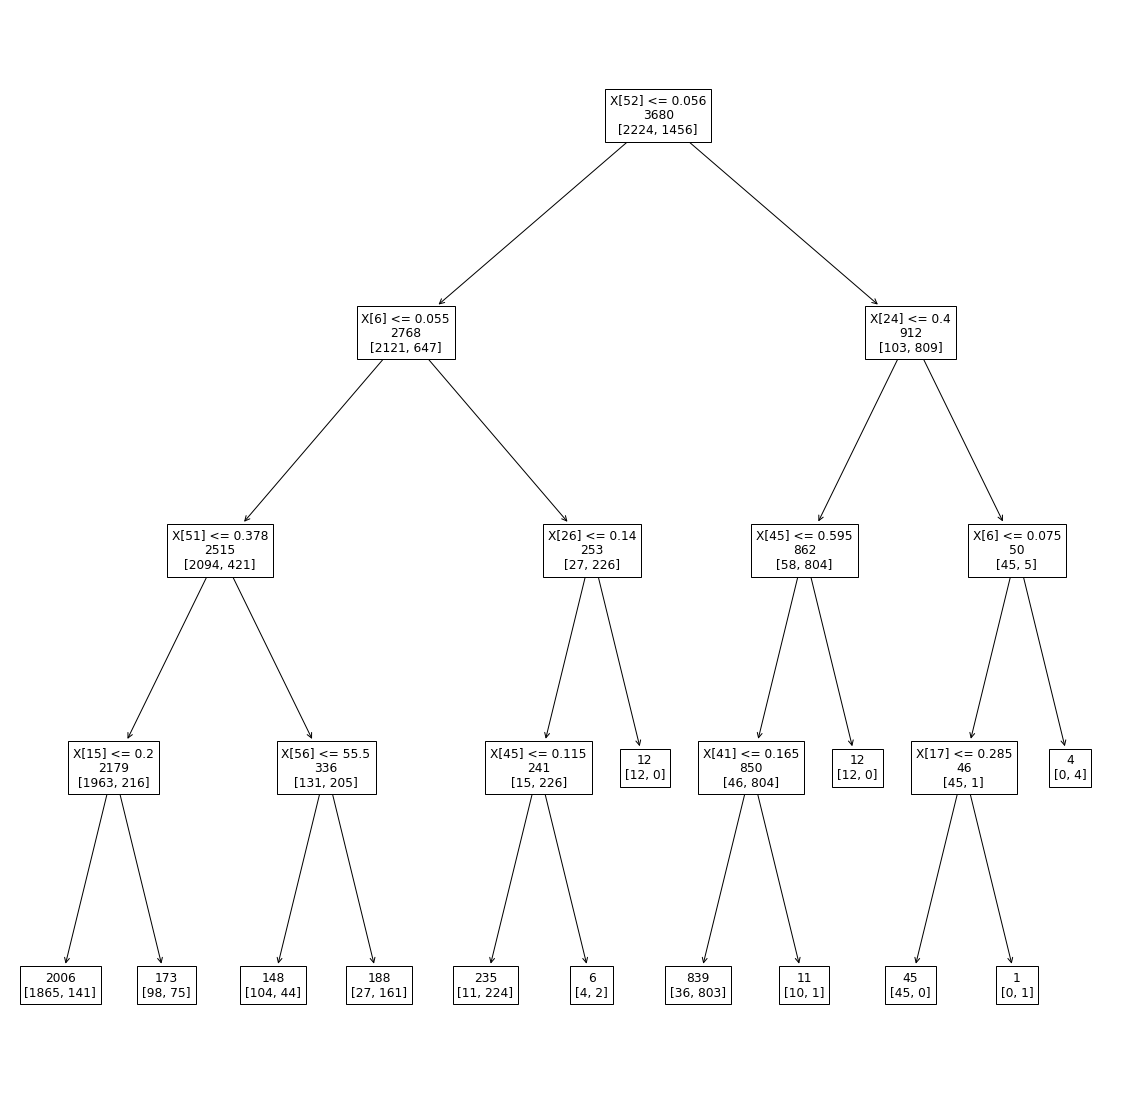

In [11]:
#tree.plot_tree(CART.fit(X_train, Y_train), impurity = False, label = 'none') 
fig, ax = plt.subplots(figsize=(20, 20))  # whatever size you want
tree.plot_tree(CART.fit(X_train, Y_train), ax=ax, impurity = False, label = 'none')
plt.show()

In [12]:
Y_pred_prob = CART.predict_proba(X_test)
roc_auc_score(Y_test, Y_pred_prob[:,1])

0.9187898563680792

# Random Forest

In [13]:
RF = ensemble.RandomForestClassifier(random_state = 1)
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
pred = RF.predict(X_test)
conf_matrix = confusion_matrix(y_pred = pred, y_true = Y_test)
accuracy_RF = np.sum(np.diagonal(conf_matrix)) / len(pred)

print ("The confusion matrix is:\n", conf_matrix)
print("The accuracy of RF is "+str(round(accuracy_RF,2)*100)+"%.")

The confusion matrix is:
 [[550  14]
 [ 23 334]]
The accuracy of RF is 96.0%.


In [15]:
Y_pred_prob = RF.predict_proba(X_test)
roc_auc_score(Y_test, Y_pred_prob[:,1])

0.9877575143532591

## Plot AUC vs max depth of CART and RF

In [16]:
max_depth_list = [2*i for i in range(1,31)]


In [17]:
AUC_CART = []

for i in max_depth_list:
    CART = tree.DecisionTreeClassifier(max_depth = i, random_state = 1)
    CART.fit(X_train, Y_train)
    Y_pred_prob = CART.predict_proba(X_test)
    AUC_CART.append(roc_auc_score(Y_test, Y_pred_prob[:,1]))

In [18]:
max_depth_list

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60]

In [19]:
AUC_CART

[0.8516374634960368,
 0.9187898563680792,
 0.926636966843475,
 0.9372156664084074,
 0.9249582811848145,
 0.9166070683592586,
 0.9040392752845818,
 0.9061152829926297,
 0.9176624550529432,
 0.9166170014104933,
 0.9161128990603333,
 0.9157677255299282,
 0.9122563919184694,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176,
 0.9072575838846176]

In [20]:
AUC_RF = []

for i in max_depth_list:
    RF = ensemble.RandomForestClassifier(max_depth = i, random_state = 1)
    RF.fit(X_train, Y_train)
    Y_pred_prob = RF.predict_proba(X_test)
    AUC_RF.append(roc_auc_score(Y_test, Y_pred_prob[:,1]))

In [21]:
AUC_RF

[0.9591428770089596,
 0.9719118143711385,
 0.9771514988974312,
 0.980498937163518,
 0.9821676897709438,
 0.9845491388044578,
 0.9845392057532232,
 0.9849712934819318,
 0.9864836005324116,
 0.9862377575143533,
 0.9863470210779347,
 0.9868362238512427,
 0.9865754812563323,
 0.9881051711464728,
 0.9865978306216103,
 0.9879983908457001,
 0.986548165365437,
 0.9871615312791783,
 0.9874570395534101,
 0.9876904662574248,
 0.9877103323598941,
 0.987817112660667,
 0.9877575143532591,
 0.9877575143532591,
 0.9877575143532591,
 0.9877575143532591,
 0.9877575143532591,
 0.9877575143532591,
 0.9877575143532591,
 0.9877575143532591]

### n_estimators = 10 was also tested, giving a similar result compared to n_estimator = 100. (0.9872 vs 0.9878) (Codes not shown)

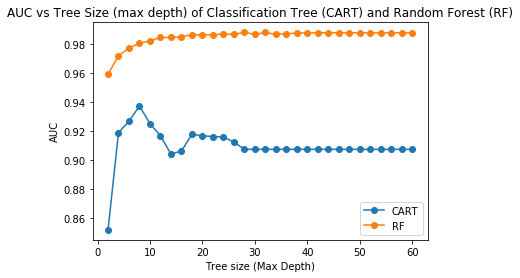

In [22]:
fig, ax = plt.subplots()
lines = ax.plot(max_depth_list, AUC_CART, marker = 'o', label = 'CART')
lines = ax.plot(max_depth_list, AUC_RF, marker = 'o', label = 'RF')
ax.set(title = "AUC vs Tree Size (max depth) of Classification Tree (CART) and Random Forest (RF)", 
       xlabel = "Tree size (Max Depth)", 
       ylabel = "AUC")
ax.legend()
plt.show()